In [2]:
#Import the required libraries
import pandas as pd
import sdv


In [3]:
#Import the dataset
real_data = pd.read_csv('OriginalDataset.csv')

#Print the first five rows of the data
print(real_data.head())

   Id  O_score  C_score  E_score  A_score  N_score  Numerical Aptitude  \
0   1     5.45     8.67     3.45     5.34     4.23                9.23   
1   2     8.78     5.67     4.56     6.45     4.23                5.12   
2   3     6.12     6.78     9.34     7.56     5.01                6.23   
3   4     9.12     8.78     4.23     5.67     4.56                7.89   
4   5     6.45     7.56     5.67     9.12     4.23                5.34   

   Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  \
0              4.56                 6.78                7.89   
1              8.45                 7.89                6.34   
2              4.23                 6.45                6.67   
3              5.34                 6.45                9.34   
4              4.01                 6.23                5.78   

   Verbal Reasoning              Career  
0              6.12          Accountant  
1              6.01    Graphic Designer  
2              8.45         Salesperson  
3 

In [4]:
#Visualize the metadata
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data = real_data)
print(metadata)

{
    "tables": {
        "table": {
            "primary_key": "Id",
            "columns": {
                "Id": {
                    "sdtype": "id"
                },
                "O_score": {
                    "sdtype": "numerical"
                },
                "C_score": {
                    "sdtype": "numerical"
                },
                "E_score": {
                    "sdtype": "numerical"
                },
                "A_score": {
                    "sdtype": "numerical"
                },
                "N_score": {
                    "sdtype": "numerical"
                },
                "Numerical Aptitude": {
                    "sdtype": "numerical"
                },
                "Spatial Aptitude": {
                    "sdtype": "numerical"
                },
                "Perceptual Aptitude": {
                    "sdtype": "numerical"
                },
                "Abstract Reasoning": {
                    "sdtype": "nume

In [5]:
metadata.update_column(column_name = 'Career',
                       sdtype = 'categorical')
print(metadata)

{
    "tables": {
        "table": {
            "primary_key": "Id",
            "columns": {
                "Id": {
                    "sdtype": "id"
                },
                "O_score": {
                    "sdtype": "numerical"
                },
                "C_score": {
                    "sdtype": "numerical"
                },
                "E_score": {
                    "sdtype": "numerical"
                },
                "A_score": {
                    "sdtype": "numerical"
                },
                "N_score": {
                    "sdtype": "numerical"
                },
                "Numerical Aptitude": {
                    "sdtype": "numerical"
                },
                "Spatial Aptitude": {
                    "sdtype": "numerical"
                },
                "Perceptual Aptitude": {
                    "sdtype": "numerical"
                },
                "Abstract Reasoning": {
                    "sdtype": "nume

In [6]:
#Create the synthesizer
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

c:\Users\user\anaconda3\envs\env1\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [7]:
#Generate the synthetic data
synthetic_data = synthesizer.sample(num_rows=10000)
synthetic_data.head()

,Id,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5837532,6.94,9.04,3.95,6.08,4.33,8.91,2.98,3.93,5.09,4.93,Forestry Technician
1,4722751,6.98,5.54,7.79,9.21,7.07,3.23,2.78,5.12,3.03,8.84,Biotechnologist
2,13034467,4.60,8.64,9.20,9.20,6.15,3.89,2.81,3.56,3.01,6.47,Database Administrator
3,16057967,8.23,6.17,3.67,4.97,5.15,3.89,2.78,8.88,8.99,7.45,Physician
4,1749929,6.05,7.57,6.80,7.66,5.51,3.74,3.19,6.00,3.83,6.87,Interior Designer


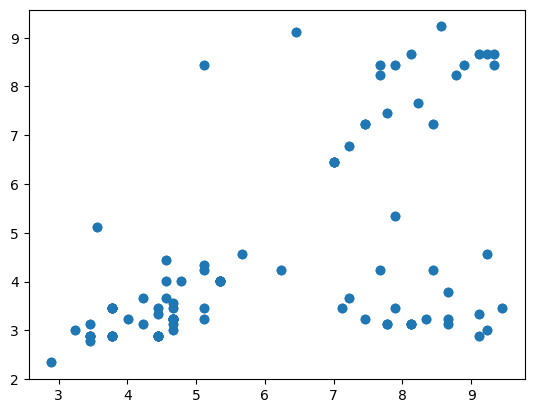

In [8]:
#Check the distribution of the real vs the synthetic data
import matplotlib.pyplot as plt

#Real data
plt.scatter(real_data['Numerical Aptitude'], real_data['Spatial Aptitude'])

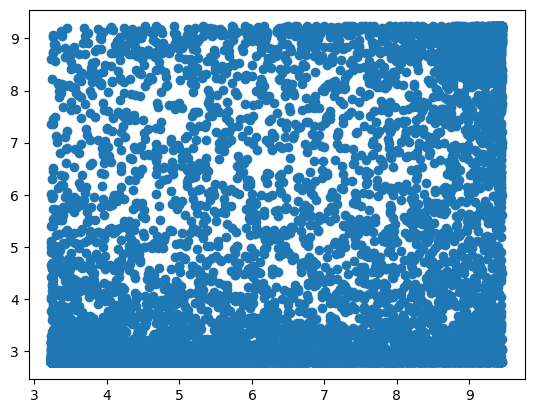

In [9]:
#For the synthetic data
plt.scatter(synthetic_data['Numerical Aptitude'], synthetic_data['Spatial Aptitude'])

In [10]:
#Find distinct values
print(real_data['Career'].nunique())

104


In [11]:
#Find the distinct values in the synthetic data set
print(synthetic_data['Career'].nunique())

104


In [12]:
#Find the number of rows in the synthetic dataset
print(len(synthetic_data))

10000


In [13]:
#Save the synthetic dataset
synthetic_data.to_csv('Career_Prediction.csv', index=False)

In [14]:
#See the careers vs the attributes
print(real_data[real_data['Career'] == 'Geologist'])

      Id  O_score  C_score  E_score  A_score  N_score  Numerical Aptitude  \
47    48     9.12     7.45     4.01     5.23     4.67                7.01   
152  153     9.12     7.45     4.01     5.23     4.67                7.01   

     Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  \
47               6.45                 6.78                8.78   
152              6.45                 6.78                8.78   

     Verbal Reasoning     Career  
47               5.45  Geologist  
152              5.45  Geologist  


In [15]:
#Print the values for Geologist in the synthetic dataset
print(synthetic_data[synthetic_data['Career'] == 'Geologist'])

            Id  O_score  C_score  E_score  A_score  N_score  \
18     3823888     3.41     4.86     7.34     9.30     6.03   
165    7413774     8.16     8.02     3.49     5.67     5.53   
296   15263180     6.37     7.31     5.62     7.04     5.43   
299    7839339     5.28     9.44     3.47     7.62     3.55   
347     965149     7.81     8.75     3.96     7.42     4.13   
...        ...      ...      ...      ...      ...      ...   
9268  13007535     9.10     8.40     4.57     4.91     4.63   
9364  12502329     7.73     6.67     3.51     7.24     7.15   
9421   1069499     6.71     3.56     8.72     7.90     5.83   
9465  10100214     5.64     8.44     5.61     9.00     5.93   
9776   6914291     8.70     6.99     7.16     6.79     5.17   

      Numerical Aptitude  Spatial Aptitude  Perceptual Aptitude  \
18                  3.23              2.78                 6.40   
165                 3.97              2.78                 7.26   
296                 8.44              3.82

In [16]:
#Plot the values for the geologist
x = synthetic_data[synthetic_data['Career'] == 'Geologist']
#print(x.head())
x = x.drop('Career', axis=1)
#print(x)
averages = x.mean()
print(averages)
#plt.bar(x)

Id                     8.424027e+06
O_score                7.096759e+00
C_score                7.523148e+00
E_score                5.572500e+00
A_score                7.068241e+00
N_score                5.387778e+00
Numerical Aptitude     5.818889e+00
Spatial Aptitude       4.258981e+00
Perceptual Aptitude    5.381019e+00
Abstract Reasoning     5.720741e+00
Verbal Reasoning       6.774352e+00
dtype: float64


In [17]:
import sdmetrics
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data = real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 12/12 [00:00<00:00, 1021.73it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 150.38it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [18]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:00<00:00, 97.58it/s]|
Column Shapes Score: 79.64%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:00<00:00, 121.70it/s]|
Column Pair Trends Score: 77.18%

Overall Score (Average): 78.41%



In [19]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,O_score,KSComplement,0.887805
1,C_score,KSComplement,0.737419
2,E_score,KSComplement,0.865010
3,A_score,KSComplement,0.792838
4,N_score,KSComplement,0.847729
5,Numerical Aptitude,KSComplement,0.795290
6,Spatial Aptitude,KSComplement,0.515848
7,Perceptual Aptitude,KSComplement,0.861862
8,Abstract Reasoning,KSComplement,0.720157
9,Verbal Reasoning,KSComplement,0.777419


In [ ]:
#---------------------------------------------------------

Try the CTGANSynthesizer to generate more accurate data.

In [36]:
#Create a GAN synthesizer
from sdv.single_table import CTGANSynthesizer

ganSynthesizer = CTGANSynthesizer(metadata, epochs=455)
ganSynthesizer.fit(real_data)

gan_synthetic_data = ganSynthesizer.sample(num_rows=1000)


In [37]:
#Get the parameters
ganSynthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': ['en_US'],
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': False,
 'epochs': 455,
 'pac': 10,
 'cuda': True}

In [38]:
#Find the loss and accuracy
ganSynthesizer.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,4.706402,-0.002470
1,1,4.748739,-0.025333
2,2,4.728577,-0.024666
3,3,4.719938,-0.059525
4,4,4.685781,-0.065766
...,...,...,...
450,450,0.115480,-0.353703
451,451,0.125122,-0.224096
452,452,-0.001705,-0.235603
453,453,0.005579,-0.133926


In [39]:
#Plot the loss values
import plotly.io as pio
fig = ganSynthesizer.get_loss_values_plot()
fig.show()

In [40]:
#Check the synthetic data
print(gan_synthetic_data[gan_synthetic_data['Career'] == 'Geologist'])

           Id  O_score  C_score  E_score  A_score  N_score  \
8     9391254     6.54     8.66     4.98     4.78     6.46   
77    2564209     7.24     6.41     8.02     7.24     6.53   
188    820952     6.40     8.56     3.58     4.34     3.89   
313  11642445     5.78     3.56     5.95     6.00     2.89   
464   6415208     7.48     8.11     4.51     6.00     5.83   
511   4603024     6.79     8.58     3.46     6.94     6.06   
608  13957892     8.14     9.06     5.37     3.23     4.22   
695    656010     6.99     8.23     2.89     6.54     6.35   
805  10357702     8.44     5.46     9.34     3.23     4.54   
843  15017269     8.90     6.68     4.48     8.58     5.86   

     Numerical Aptitude  Spatial Aptitude  Perceptual Aptitude  \
8                  9.45              5.34                 4.93   
77                 9.45              6.11                 9.15   
188                7.75              3.10                 6.81   
313                8.65              2.81            

In [41]:
#Save the gan synthetic data 
gan_synthetic_data.to_csv('CareerPredictionGAN.csv', index=True)